# Median House Sale Prices forecast in Fairfield

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('Fairfield.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,369587.11,607031.57,Fairfield
1,2001-02-01,351716.13,612695.88,Fairfield
2,2001-03-01,375670.85,581427.50,Fairfield
3,2001-04-01,372628.98,579640.90,Fairfield
4,2001-05-01,401488.72,576070.59,Fairfield


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,369587.11,607031.57
1,2001-02-01,351716.13,612695.88
2,2001-03-01,375670.85,581427.50
3,2001-04-01,372628.98,579640.90
4,2001-05-01,401488.72,576070.59


Extracting only Median Sale Price as a dataframe by removing Average Sale Price feature

In [34]:
median_data=data_frame.drop(['Average Sale Price'],axis=1)

## Forecasting median_data

In [35]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,369587.11
1,2001-02-01,351716.13
2,2001-03-01,375670.85
3,2001-04-01,372628.98
4,2001-05-01,401488.72


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
median_data.columns=['ds','y']

In [37]:
median_data

,ds,y
0,2001-01-01,369587.11
1,2001-02-01,351716.13
2,2001-03-01,375670.85
3,2001-04-01,372628.98
4,2001-05-01,401488.72
...,...,...
245,2021-06-01,540000.00
246,2021-07-01,550000.00
247,2021-08-01,522000.00
248,2021-09-01,454000.00


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(median_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,560839.831870,524793.833794,600604.380229
270,2023-06-30,543747.057641,507364.620141,581524.361369
271,2023-07-31,555082.976568,516919.108406,592775.696047
272,2023-08-31,488292.553870,450675.875832,528568.606033
273,2023-09-30,500931.901822,463666.085156,539383.440810


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,386204.689385,312808.685535,385839.347670,386204.689385,386204.689385,-37415.242078,-37415.242078,-37415.242078,-37415.242078,-37415.242078,-37415.242078,0.0,0.0,0.0,348789.447307
1,2001-02-01,389637.197967,306417.208770,376769.800315,389637.197967,389637.197967,-48236.579021,-48236.579021,-48236.579021,-48236.579021,-48236.579021,-48236.579021,0.0,0.0,0.0,341400.618946
2,2001-03-01,392737.528300,322412.115124,392943.411932,392737.528300,392737.528300,-34782.036414,-34782.036414,-34782.036414,-34782.036414,-34782.036414,-34782.036414,0.0,0.0,0.0,357955.491886
3,2001-04-01,396170.036882,347331.394766,415945.766776,396170.036882,396170.036882,-12822.686137,-12822.686137,-12822.686137,-12822.686137,-12822.686137,-12822.686137,0.0,0.0,0.0,383347.350746
4,2001-05-01,399491.819382,375819.836210,448260.793556,399491.819382,399491.819382,12787.105655,12787.105655,12787.105655,12787.105655,12787.105655,12787.105655,0.0,0.0,0.0,412278.925037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,496231.889974,524793.833794,600604.380229,486719.963843,506437.092513,64607.941896,64607.941896,64607.941896,64607.941896,64607.941896,64607.941896,0.0,0.0,0.0,560839.831870
270,2023-06-30,497744.566358,507364.620141,581524.361369,487562.667230,508613.199404,46002.491284,46002.491284,46002.491284,46002.491284,46002.491284,46002.491284,0.0,0.0,0.0,543747.057641
271,2023-07-31,499307.665287,516919.108406,592775.696047,488230.711767,510733.400428,55775.311281,55775.311281,55775.311281,55775.311281,55775.311281,55775.311281,0.0,0.0,0.0,555082.976568
272,2023-08-31,500870.764217,450675.875832,528568.606033,488728.268819,513169.268746,-12578.210347,-12578.210347,-12578.210347,-12578.210347,-12578.210347,-12578.210347,0.0,0.0,0.0,488292.553870


## Plotting the forecast data

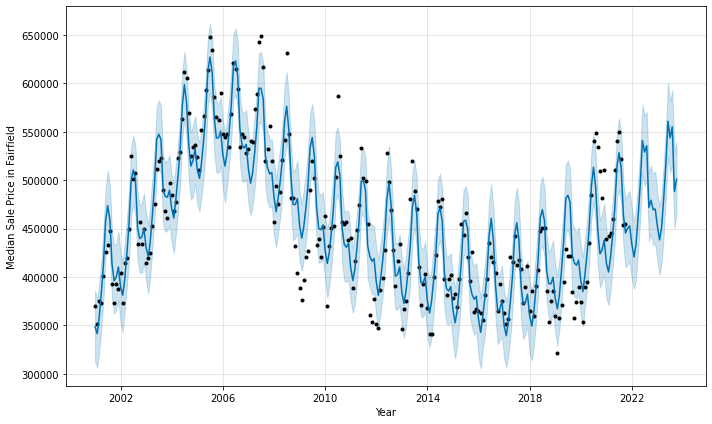

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

## Plotting components of forecast data

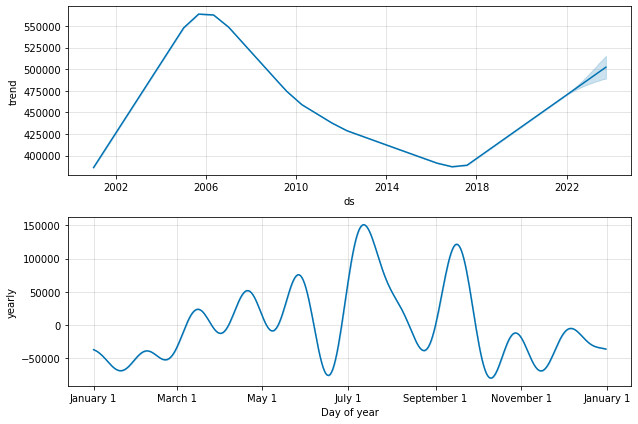

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.967371e+09,44355.057350,35846.580374,0.075763,0.060269,0.078147,0.454545
1,40 days,1.830824e+09,42788.125784,33789.174823,0.071610,0.054067,0.073706,0.500000
2,42 days,1.808943e+09,42531.675935,33089.092029,0.070222,0.051036,0.072273,0.522727
3,44 days,1.841613e+09,42914.020875,33831.862076,0.072322,0.051036,0.074214,0.488636
4,45 days,1.915644e+09,43768.068656,35137.386872,0.075142,0.057251,0.077171,0.454545


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.92423715257334%
Horizon: 40 days 00:00:00, Accuracy: 99.92839011949181%
Horizon: 42 days 00:00:00, Accuracy: 99.92977838705919%
Horizon: 44 days 00:00:00, Accuracy: 99.92767835216206%
Horizon: 45 days 00:00:00, Accuracy: 99.924857932294%
Horizon: 46 days 00:00:00, Accuracy: 99.9261846815543%
Horizon: 47 days 00:00:00, Accuracy: 99.9274452981114%
Horizon: 49 days 00:00:00, Accuracy: 99.92698013993032%
Horizon: 50 days 00:00:00, Accuracy: 99.92825380932697%
Horizon: 51 days 00:00:00, Accuracy: 99.92983162073642%
Horizon: 52 days 00:00:00, Accuracy: 99.93131626548902%
Horizon: 54 days 00:00:00, Accuracy: 99.9320611849755%
Horizon: 55 days 00:00:00, Accuracy: 99.9329632256716%
Horizon: 56 days 00:00:00, Accuracy: 99.93435396989176%
Horizon: 58 days 00:00:00, Accuracy: 99.93346433126715%
Horizon: 60 days 00:00:00, Accuracy: 99.93019538593776%
Horizon: 61 days 00:00:00, Accuracy: 99.92779060833986%
Horizon: 62 days 00:00:00, Accuracy: 99.93080725217902

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

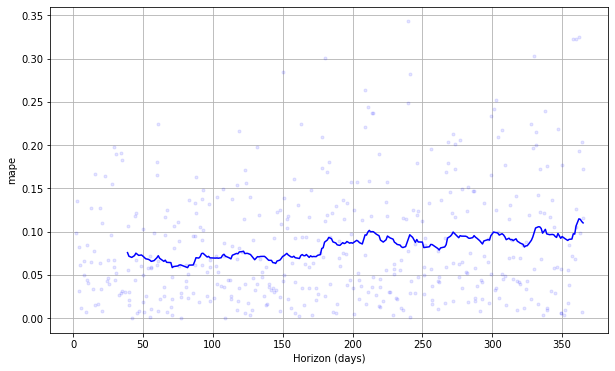

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_median_sale_price.pkl','wb') as file:
    pickle.dump(m,file)